In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks

In [8]:
dataset = pd.read_csv('csv_result-ebay_confianca_completo.csv')
dataset.dropna(inplace=True)
dataset.shape

(5806, 75)

In [9]:
dataset.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,...,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,...,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,...,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,...,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,...,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,...,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.648607,0.616075,0.816841,Bom


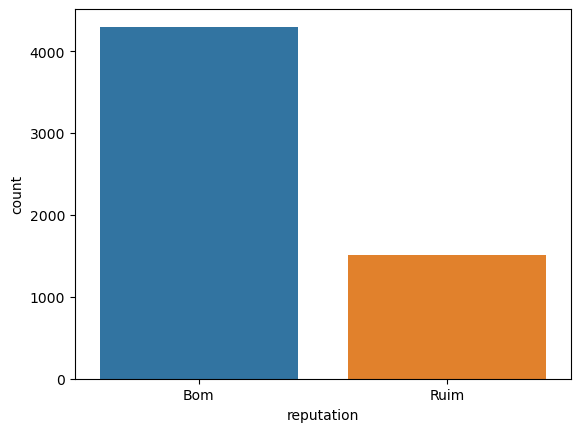

In [10]:
sns.countplot(x=dataset['reputation']);

In [11]:
dataset['blacklist'] = dataset['blacklist'] == 'S' #Passar de N e S para falso e verdadeiro.

In [12]:
X = dataset.iloc[:,0:74].values
y = dataset.iloc[:,74].values

In [13]:
X.shape, y.shape, np.unique(y, return_counts=True)

((5806, 74),
 (5806,),
 (array(['Bom', 'Ruim'], dtype=object), array([4299, 1507], dtype=int64)))

Padrão

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y)

In [15]:
X_train.shape, X_test.shape

((4644, 74), (1162, 74))

In [16]:
y_train.shape, y_test.shape

((4644,), (1162,))

TomekLinks

In [17]:
tl = TomekLinks(sampling_strategy='majority')
X_under, y_under = tl.fit_resample(X, y)

In [18]:
X_under.shape, y_under.shape, np.unique(y_under, return_counts= True)

((5417, 74),
 (5417,),
 (array(['Bom', 'Ruim'], dtype=object), array([3910, 1507], dtype=int64)))

In [26]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_under, y_under, test_size=0.2, stratify= y_under)

SMOTE

In [27]:
smote = SMOTE(sampling_strategy='minority')
X_over, y_over = smote.fit_resample(X, y)

In [28]:
X_over.shape, y_over.shape, np.unique(y_over, return_counts= True)

((8598, 74),
 (8598,),
 (array(['Bom', 'Ruim'], dtype=object), array([4299, 4299], dtype=int64)))

In [37]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_over, y_over, test_size=0.2, stratify= y_over)

Função RandomForestClassifier (Ao invés do Naive-Bayes, por ser mais complexa)


In [51]:
model = RandomForestClassifier()
model_under = RandomForestClassifier()
model_over = RandomForestClassifier()

In [52]:
model.fit(X_train, y_train)
model_under.fit(X_train_u, y_train_u)
model_over.fit(X_train_o, y_train_o)

RandomForestClassifier()

In [53]:
predict = model.predict(X_test)
predict_under = model_under.predict(X_test_u)
predict_over = model_over.predict(X_test_o)

In [54]:
predict, predict_under, predict_over

(array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Bom', 'Bom'], dtype=object),
 array(['Bom', 'Bom', 'Bom', ..., 'Bom', 'Bom', 'Bom'], dtype=object),
 array(['Ruim', 'Bom', 'Bom', ..., 'Ruim', 'Bom', 'Ruim'], dtype=object))

In [55]:
accuracy_score(predict, y_test), accuracy_score(predict_under, y_test_u), accuracy_score(predict_over, y_test_o)

(0.7452667814113597, 0.7269372693726938, 0.8156976744186046)